# PODS PROJECT

# Project Title:  Analysis of property market in london

# Application domain and datasets:

Which application domain and which datasets? 

My application domain is the housing market, i want to use this application domain due to myself having an interest in the application domain. Where buying a house is the biggest transaction/finance commitment most of us will have to make. I find it it intresting how housing has increased over the years, making it more harder for people to own a house and would like to further investigate by using a dataset from kaggle called "Housing Prices in London" (places in and around london)  and merge with another dataset "Open Postcode Geo" (postcodes). These two dataset merged to make the dataset more complex and help verify the listings of houses as well as reduce the amount of missing rows, this is due to the "Housing prices in London" dataset having some false observation whilst the "Open Postcode Geo" dataset has every valid adresses; making sure the inner "merged" join dataset only has valid obsertaions.


Datasets is from Kaggle: 
https://www.kaggle.com/arnavkulkarni/housing-prices-in-london (house dataset)
https://www.kaggle.com/danwinchester/open-postcode-geo  (geo locator) 



# initial analytical questions:
What are your analytical questions and what is your motivation for answering them?

What features in the dataset has a positive corellation and negative coreelation/relationship with the house price?

What location in london is the most sort after? 

What is the different house prices for certain type of properties (House/flat/new development)?

What are the most important features in predicting the house type and how accurate are they?

How well can this dataset predict the property type (Flat or house) using a ML algorithm (logistic regression)?

Does location within london have a impact on price and/or property type (geospatial model building)? 

I want to understand how and why house prices have increased in london, this can be done through accessing the features that are assumed to be directly related to house price such as size location and number of bedrooms.  I also want to see if i can predict the house prices (independent variable) based on my dataset of the other fields(dependent variables) using fitted regression model.

# Plan:

What is your plan? Include data processing, data derivation, model building and validation. The aim of your plan is to address your research questions.

My plan:

a. Data processing: 

1.First import the two datasets into two seperate dataframes. 

2.Then to first merge the datasets via the poscode column using the pandas which will help makesure all my row (observations) are valid in terms of property location. Since the postcode dataset has all the valid locations of properties in the UK. 

3.I will then rename the columns of the dataset to give each column more meaning making it easier for anyone viewing the dataset what each column means. 

4.Make sure the dataset has the right format. 

5.Making sure that there are no missing values in my dataset either by removal or replacing any missing values. 

6.Dropping any unwanted columns from the dataset. 

7.Making sure that each variable has the correct data type, if not change it to correct the dataframe. Then define the shape, and each variable through definition. 

b. Data derivation: 

1.Deriving a new column from the existing variables: price per sqm, to get more insight into the dataset.

2.Making sure that each variable has the correct unit of measurement (for numerical variables). i would also like to build new columns from the existing columns such as produce a column called price per sqm, to get a more standarized measurmennt of the property.

c. Explanatory data analysis:  

1.Seeing the unique value of the columns (variables),Fixing any values that should not be there.

2.I would also like to perform explanatory data analysis for my dataset, to see the characteristics of datasets such as shape (size of dataset), statistical knowledege of each numerical column such as outlier to be aware about in addition to the relationship between each column, perform visualisations to show this through boxplot,scatterplot and heatmap. 

3.I would also like to filter different dataframes from post area (North,south,west east,...etc) to see the effect of price with direction of area to price, along with type of price (flat,house,new build). 

4.Plot bar plots and/or pie chart for the categorical variables. 


d.Model building 

1.Build a logistic regression model (binary classification) to see how well dataset can predict wheter or not it's a flat or a house.  

2.Build a geospatial model to see if location can predict model building.

# 1 Preprocessing: Importing the dataset + Data preparation 

In [1]:
# Import the needed packages for the code
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon
import missingno as msn
import pyproj  
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points

# 1.1 Loading and merging the dataset 

Merge the housing dataset with postcode dastaset.

# 1.1.1 Load the Housing dataset



In [2]:
#Load the Housing dataset
# the 1st Dataset is the house dataset which is about house features with house price being the main variable of interest in our analysis
Housing = pd.read_csv("downloads/London.csv")
Housing

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL
...,...,...,...,...,...,...,...,...,...,...,...
3475,3475,One Lillie Square,3350000,New development,1410,3,3,3,NaN,Lillie Square,SW6 1UE
3476,3476,St. James's Street,5275000,Flat / Apartment,1749,3,3,3,St James's,London,SW1A 1JT
3477,3477,Ingram Avenue,5995000,House,4435,6,6,6,Hampstead Garden Suburb,London,NW11 6TG
3478,3478,Cork Street,6300000,New development,1506,3,3,3,Mayfair,London,W1S 3AR


In [3]:
Housing.shape

(3480, 11)

House dataset has Dimension : 3480 rows with 11 columns

# 1.1.2 Load the postcode dataset:

In [4]:
#Load the location/postcode dataset:
# The second dataset is Location dataset which is a data set which has the so many variables of location such as different variation of postcode and location values longitude and langidude:
# Location of each postcode is validated/verified as it has a uk goverment licence.
Location = pd.read_csv("downloads/open_postcode_geo.csv")
Location

/Users/sufyaanshaikh/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,4,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,AB1 0AA,terminated,small,385386,801193,1,Scotland,57.101474,-2.242851,AB10AA,AB1 0AA.1,AB1 0AA,AB,AB1,AB1 0,AB1.1,0AA
0,AB1 0AB,terminated,small,385177,801314,1,Scotland,57.102554,-2.246308,AB10AB,AB1 0AB,AB1 0AB,AB,AB1,AB1 0,AB1,0AB
1,AB1 0AD,terminated,small,385053,801092,1,Scotland,57.100556,-2.248342,AB10AD,AB1 0AD,AB1 0AD,AB,AB1,AB1 0,AB1,0AD
2,AB1 0AE,terminated,small,384600,799300,8,Scotland,57.084444,-2.255708,AB10AE,AB1 0AE,AB1 0AE,AB,AB1,AB1 0,AB1,0AE
3,AB1 0AF,terminated,large,384460,800660,8,Scotland,57.096656,-2.258102,AB10AF,AB1 0AF,AB1 0AF,AB,AB1,AB1 0,AB1,0AF
4,AB1 0AG,terminated,large,383890,800710,8,Scotland,57.097085,-2.267513,AB10AG,AB1 0AG,AB1 0AG,AB,AB1,AB1 0,AB1,0AG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525570,ZE3 9JW,live,small,438975,1110038,1,Scotland,59.873651,-1.305697,ZE39JW,ZE3 9JW,ZE3 9JW,ZE,ZE3,ZE3 9,ZE3,9JW
2525571,ZE3 9JX,live,small,438872,1110219,1,Scotland,59.875286,-1.307502,ZE39JX,ZE3 9JX,ZE3 9JX,ZE,ZE3,ZE3 9,ZE3,9JX
2525572,ZE3 9JY,live,small,438498,1112029,1,Scotland,59.891572,-1.313847,ZE39JY,ZE3 9JY,ZE3 9JY,ZE,ZE3,ZE3 9,ZE3,9JY
2525573,ZE3 9JZ,live,small,438662,1112122,1,Scotland,59.892392,-1.310899,ZE39JZ,ZE3 9JZ,ZE3 9JZ,ZE,ZE3,ZE3 9,ZE3,9JZ


In [5]:
Location.shape

(2525575, 17)

House dataset has Dimension is 2,525,575 rows with 17 columns

# 1.1.3 Rename the columns to more suitable name for reader to understand and so i can merge the datasets.

In [6]:
# I want to Rename the columns in orfer to keep from the numbers in the column index to longitude , latitude and postal code. 
# which has the same column name and data values type as the housing dataset. This will allow me to merge the
# datasets with there being a common column between the two datasets.
Location = Location.rename(columns={"AB1 0AA":"Postal Code","small":"Size","57.101474":"Longitude","-2.242851":"Latitude","AB":"Direction"})
Location

,Postal Code,terminated,Size,385386,801193,1,Scotland,Longitude,Latitude,AB10AA,AB1 0AA.1,AB1 0AA,Direction,AB1,AB1 0,AB1.1,0AA
0,AB1 0AB,terminated,small,385177,801314,1,Scotland,57.102554,-2.246308,AB10AB,AB1 0AB,AB1 0AB,AB,AB1,AB1 0,AB1,0AB
1,AB1 0AD,terminated,small,385053,801092,1,Scotland,57.100556,-2.248342,AB10AD,AB1 0AD,AB1 0AD,AB,AB1,AB1 0,AB1,0AD
2,AB1 0AE,terminated,small,384600,799300,8,Scotland,57.084444,-2.255708,AB10AE,AB1 0AE,AB1 0AE,AB,AB1,AB1 0,AB1,0AE
3,AB1 0AF,terminated,large,384460,800660,8,Scotland,57.096656,-2.258102,AB10AF,AB1 0AF,AB1 0AF,AB,AB1,AB1 0,AB1,0AF
4,AB1 0AG,terminated,large,383890,800710,8,Scotland,57.097085,-2.267513,AB10AG,AB1 0AG,AB1 0AG,AB,AB1,AB1 0,AB1,0AG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525570,ZE3 9JW,live,small,438975,1110038,1,Scotland,59.873651,-1.305697,ZE39JW,ZE3 9JW,ZE3 9JW,ZE,ZE3,ZE3 9,ZE3,9JW
2525571,ZE3 9JX,live,small,438872,1110219,1,Scotland,59.875286,-1.307502,ZE39JX,ZE3 9JX,ZE3 9JX,ZE,ZE3,ZE3 9,ZE3,9JX
2525572,ZE3 9JY,live,small,438498,1112029,1,Scotland,59.891572,-1.313847,ZE39JY,ZE3 9JY,ZE3 9JY,ZE,ZE3,ZE3 9,ZE3,9JY
2525573,ZE3 9JZ,live,small,438662,1112122,1,Scotland,59.892392,-1.310899,ZE39JZ,ZE3 9JZ,ZE3 9JZ,ZE,ZE3,ZE3 9,ZE3,9JZ


With merging the Location dataset with the housing dataset, this will help create a new dataframe via 
the postcode column named "Postal Code" that matches for both datasets which also helps clean my dataset as it will remove invalid data 
location  with respect to postal code as the location dataset provides the every valid postcode in the uk, verified by  dataset having a uk open goverment licence. This is because the merged dataset is the union between the datasets.



In [7]:
# Merge the Housing dataset with the location dataset based on the same column name "Postal Code" which is the post code
df = pd.merge(Housing,Location,on="Postal Code")
df

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,...,Longitude,Latitude,AB10AA,AB1 0AA.1,AB1 0AA,Direction,AB1,AB1 0,AB1.1,0AA
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,...,51.424773,-0.189474,SW198NY,SW198NY,SW19 8NY,SW,SW19,SW19 8,SW19,8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,...,51.526404,-0.097853,EC1V3PA,EC1V3PA,EC1V 3PA,EC,EC1V,EC1V 3,EC1V,3PA
2,568,Seward Street,650000,Flat / Apartment,674,2,2,2,Clerkenwell,London,...,51.526404,-0.097853,EC1V3PA,EC1V3PA,EC1V 3PA,EC,EC1V,EC1V 3,EC1V,3PA
3,601,Seward Street,655000,Flat / Apartment,703,2,2,2,Clerkenwell,London,...,51.526404,-0.097853,EC1V3PA,EC1V3PA,EC1V 3PA,EC,EC1V,EC1V 3,EC1V,3PA
4,1169,Seward Street,695000,Flat / Apartment,796,2,2,2,Clerkenwell,London,...,51.526404,-0.097853,EC1V3PA,EC1V3PA,EC1V 3PA,EC,EC1V,EC1V 3,EC1V,3PA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,3474,Queen's Gate,3500000,Penthouse,1984,3,3,3,NaN,London,...,51.496248,-0.179757,SW75JW,SW7 5JW,SW7 5JW,SW,SW7,SW7 5,SW7,5JW
3391,3476,St. James's Street,5275000,Flat / Apartment,1749,3,3,3,St James's,London,...,51.507387,-0.140579,SW1A1JT,SW1A1JT,SW1A 1JT,SW,SW1A,SW1A 1,SW1A,1JT
3392,3477,Ingram Avenue,5995000,House,4435,6,6,6,Hampstead Garden Suburb,London,...,51.573740,-0.177125,NW116TG,NW116TG,NW11 6TG,NW,NW11,NW11 6,NW11,6TG
3393,3478,Cork Street,6300000,New development,1506,3,3,3,Mayfair,London,...,51.510369,-0.140918,W1S3AR,W1S 3AR,W1S 3AR,W,W1S,W1S 3,W1S,3AR


Result in the rows being reduced from 3480 (from the housing dataset) to 3395 rows, rows removed and consequently 
rows reduced (using the location dataset) there has also 10 columns added (from the location dataset) 
Therefore we removed 85 observations as a result due to the invalid postcodes.

In [8]:
df.shape

(3395, 27)

dimension of the merged dataframe is 3395 rows and 27 columns

Drop any unwanted columnns of the merged dataset not suitable or needed for any anlysis. Dataset will have reduced from 27 columns to 10 columns.

In [9]:
#Now, i want to drop the unwanted columns such as the different version of postcodes such as innner codes and outer codes 
# codes with the exception of postcode Area which gives direction of location in a City.

# I want to remove column which provide the index via the location dataset which is now arbitrary.

# I also want to drop the columns number of bathrooms and receptions since it's unlikely for bathrooms & Reception to be 
# the same number of bedrooms, hence i suspect that number of Recptions and Bathrooms to be falsified info and just
# copied from the number of bedrooms column, since the values of bathrooms & receptions are not feasible/realistic given
# the domain knowledge.

df = df.drop(columns=["Unnamed: 0","terminated","385386","801193","1","Scotland","AB10AA","AB1 0AA.1","AB1 0","AB1.1","0AA","AB1","AB1  0AA","Property Name","No. of Bathrooms","No. of Receptions","City/County"])
df

,Price,House Type,Area in sq ft,No. of Bedrooms,Location,Postal Code,Size,Longitude,Latitude,Direction
0,1675000,House,2716,5,Wimbledon,SW19 8NY,small,51.424773,-0.189474,SW
1,650000,Flat / Apartment,814,2,Clerkenwell,EC1V 3PA,small,51.526404,-0.097853,EC
2,650000,Flat / Apartment,674,2,Clerkenwell,EC1V 3PA,small,51.526404,-0.097853,EC
3,655000,Flat / Apartment,703,2,Clerkenwell,EC1V 3PA,small,51.526404,-0.097853,EC
4,695000,Flat / Apartment,796,2,Clerkenwell,EC1V 3PA,small,51.526404,-0.097853,EC
...,...,...,...,...,...,...,...,...,...,...
3390,3500000,Penthouse,1984,3,NaN,SW7 5JW,small,51.496248,-0.179757,SW
3391,5275000,Flat / Apartment,1749,3,St James's,SW1A 1JT,small,51.507387,-0.140579,SW
3392,5995000,House,4435,6,Hampstead Garden Suburb,NW11 6TG,small,51.573740,-0.177125,NW
3393,6300000,New development,1506,3,Mayfair,W1S 3AR,small,51.510369,-0.140918,W


In [10]:
# Print dataframe to see it as an array: 
print(df)

        Price        House Type  Area in sq ft  No. of Bedrooms  \
0     1675000             House           2716                5   
1      650000  Flat / Apartment            814                2   
2      650000  Flat / Apartment            674                2   
3      655000  Flat / Apartment            703                2   
4      695000  Flat / Apartment            796                2   
...       ...               ...            ...              ...   
3390  3500000         Penthouse           1984                3   
3391  5275000  Flat / Apartment           1749                3   
3392  5995000             House           4435                6   
3393  6300000   New development           1506                3   
3394  8650000             House           5395                6   

                     Location Postal Code   Size  Longitude   Latitude  \
0                   Wimbledon    SW19 8NY  small  51.424773  -0.189474   
1                 Clerkenwell    EC1V 3PA  smal

In [11]:
# To view the first few observations in the dataset: 
df.head()

,Price,House Type,Area in sq ft,No. of Bedrooms,Location,Postal Code,Size,Longitude,Latitude,Direction
0,1675000,House,2716,5,Wimbledon,SW19 8NY,small,51.424773,-0.189474,SW
1,650000,Flat / Apartment,814,2,Clerkenwell,EC1V 3PA,small,51.526404,-0.097853,EC
2,650000,Flat / Apartment,674,2,Clerkenwell,EC1V 3PA,small,51.526404,-0.097853,EC
3,655000,Flat / Apartment,703,2,Clerkenwell,EC1V 3PA,small,51.526404,-0.097853,EC
4,695000,Flat / Apartment,796,2,Clerkenwell,EC1V 3PA,small,51.526404,-0.097853,EC


In [12]:
# To view the last few observation inn the dataset: 
df.tail()

,Price,House Type,Area in sq ft,No. of Bedrooms,Location,Postal Code,Size,Longitude,Latitude,Direction
3390,3500000,Penthouse,1984,3,NaN,SW7 5JW,small,51.496248,-0.179757,SW
3391,5275000,Flat / Apartment,1749,3,St James's,SW1A 1JT,small,51.507387,-0.140579,SW
3392,5995000,House,4435,6,Hampstead Garden Suburb,NW11 6TG,small,51.573740,-0.177125,NW
3393,6300000,New development,1506,3,Mayfair,W1S 3AR,small,51.510369,-0.140918,W
3394,8650000,House,5395,6,Highgate,N6 4LP,small,51.574954,-0.167869,N


# 1.2 Handling any missing data

In [13]:
#Detect missing values/NaN and None with df.isnull() or df.isna()
null = pd.isnull(df.Location)
null

0       False
1       False
2       False
3       False
4       False
        ...  
3390     True
3391    False
3392    False
3393    False
3394    False
Name: Location, Length: 3395, dtype: bool

In [14]:
#Count the number of missing values
pd.isnull(df).sum().sum()

945

In [15]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Location,945,0.278351
Price,0,0.000000
House Type,0,0.000000
Area in sq ft,0,0.000000
No. of Bedrooms,0,0.000000
Postal Code,0,0.000000
Size,0,0.000000
Longitude,0,0.000000
Latitude,0,0.000000
Direction,0,0.000000


We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables. In this case Location. This column is also not needed as we have other columns which tell us the same information in the form of location and longitude.

Code adapted from : https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python 

In [16]:
# Drop the location column for dataset to have no missing values.
df=df.drop(columns="Location")
df

,Price,House Type,Area in sq ft,No. of Bedrooms,Postal Code,Size,Longitude,Latitude,Direction
0,1675000,House,2716,5,SW19 8NY,small,51.424773,-0.189474,SW
1,650000,Flat / Apartment,814,2,EC1V 3PA,small,51.526404,-0.097853,EC
2,650000,Flat / Apartment,674,2,EC1V 3PA,small,51.526404,-0.097853,EC
3,655000,Flat / Apartment,703,2,EC1V 3PA,small,51.526404,-0.097853,EC
4,695000,Flat / Apartment,796,2,EC1V 3PA,small,51.526404,-0.097853,EC
...,...,...,...,...,...,...,...,...,...
3390,3500000,Penthouse,1984,3,SW7 5JW,small,51.496248,-0.179757,SW
3391,5275000,Flat / Apartment,1749,3,SW1A 1JT,small,51.507387,-0.140579,SW
3392,5995000,House,4435,6,NW11 6TG,small,51.573740,-0.177125,NW
3393,6300000,New development,1506,3,W1S 3AR,small,51.510369,-0.140918,W


In [17]:
#Count the number of missing values to verify there's no missing values (output should be zero)
pd.isnull(df).sum().sum()

0

In [18]:
# The updated clean dataset:
df.shape

(3395, 9)

There are no more missing data in my dataset and there is now 9 columns in my dataset

# 1.2 Data Derivation

In [19]:
#Data derivation
# I want to convert Area from square feet to Area in square metres since metres is the more common standard unit used, 
# it is one of the seven S.I units  (International System of Units) recognised internationally. 
# this is done by multiplyinng by conversion factor between them which is : 1sqft = 0.09290304 sqm , so 
# i would need to multiply by 0.09290304 and round it, as estates round it to simplify for the consumer viewing at 
# the property and avoid being too accurate.  
df["Area in sqm"] = round (0.09290304 * df["Area in sq ft"])

# now i have created the area in sqm area using the sq ft variable,i will now drop area in sqft variable
df=df.drop(columns = "Area in sq ft")

# Now i want to derive a new feature : price per sq metres : rounded as house prices are payed to the singular pound
df["Price per sqm"] = round(df["Price"]/df["Area in sqm"])
df

,Price,House Type,No. of Bedrooms,Postal Code,Size,Longitude,Latitude,Direction,Area in sqm,Price per sqm
0,1675000,House,5,SW19 8NY,small,51.424773,-0.189474,SW,252.0,6647.0
1,650000,Flat / Apartment,2,EC1V 3PA,small,51.526404,-0.097853,EC,76.0,8553.0
2,650000,Flat / Apartment,2,EC1V 3PA,small,51.526404,-0.097853,EC,63.0,10317.0
3,655000,Flat / Apartment,2,EC1V 3PA,small,51.526404,-0.097853,EC,65.0,10077.0
4,695000,Flat / Apartment,2,EC1V 3PA,small,51.526404,-0.097853,EC,74.0,9392.0
...,...,...,...,...,...,...,...,...,...,...
3390,3500000,Penthouse,3,SW7 5JW,small,51.496248,-0.179757,SW,184.0,19022.0
3391,5275000,Flat / Apartment,3,SW1A 1JT,small,51.507387,-0.140579,SW,162.0,32562.0
3392,5995000,House,6,NW11 6TG,small,51.573740,-0.177125,NW,412.0,14551.0
3393,6300000,New development,3,W1S 3AR,small,51.510369,-0.140918,W,140.0,45000.0


In [20]:
df.shape

(3395, 10)

Dataset is now clean each column has a variable and each row has a observation 
the final merged data frame with the new derived variables has 3395 rows and 10 columns.

# 1.3 Checking data types and describing dataset variables 

In [21]:
# Dataframe of merged dataset:
df

,Price,House Type,No. of Bedrooms,Postal Code,Size,Longitude,Latitude,Direction,Area in sqm,Price per sqm
0,1675000,House,5,SW19 8NY,small,51.424773,-0.189474,SW,252.0,6647.0
1,650000,Flat / Apartment,2,EC1V 3PA,small,51.526404,-0.097853,EC,76.0,8553.0
2,650000,Flat / Apartment,2,EC1V 3PA,small,51.526404,-0.097853,EC,63.0,10317.0
3,655000,Flat / Apartment,2,EC1V 3PA,small,51.526404,-0.097853,EC,65.0,10077.0
4,695000,Flat / Apartment,2,EC1V 3PA,small,51.526404,-0.097853,EC,74.0,9392.0
...,...,...,...,...,...,...,...,...,...,...
3390,3500000,Penthouse,3,SW7 5JW,small,51.496248,-0.179757,SW,184.0,19022.0
3391,5275000,Flat / Apartment,3,SW1A 1JT,small,51.507387,-0.140579,SW,162.0,32562.0
3392,5995000,House,6,NW11 6TG,small,51.573740,-0.177125,NW,412.0,14551.0
3393,6300000,New development,3,W1S 3AR,small,51.510369,-0.140918,W,140.0,45000.0


My Variable description of the dataframe (df):

Price : House sold price in the UK given in (£/GBP) , datatype: Numerical. 

House Type: Type of house, can be either House or Flat or New develepment, datatype: Categorical (nominal). 

No. of Bedrooms: Number of bedrooms in a House/Flat/New development) , datatype : int/categorical (int).

Size: Size of the property : Small, medium, and Large  datatype: Categorical (nominal)

Postal Code : Postcode of each property to verify it's a real adress using the uk governed licensed dataset,datatype:categorical.

Longitude: the angular distance of a place east or west of the Greenwich meridian,datatype: object/float

Latitude: the angular distance of a place north or south of the earth's equator, datatype: object/float

Direction: A subset of the postcode which gives us a specfic section/direction london,datatype:categorical(nominal)

Area in sqm: Size of the property in the standardized metric sqm, datatype: Numerical. 

Price per sqm : Price of the property divide by the area size of the property to see who got more value out of their house in terms of size, datatype: Numerical.  

In [22]:
# Shape of the dimension
df.shape

(3395, 10)

In [23]:
# Seeing the columns in our dataset
df.columns

Index(['Price', 'House Type', 'No. of Bedrooms', 'Postal Code', 'Size',
       'Longitude', 'Latitude', 'Direction', 'Area in sqm', 'Price per sqm'],
      dtype='object')

In [24]:
# Checking the datatype for each of the variables in the dataframe 
df.dtypes

Price                int64
House Type          object
No. of Bedrooms      int64
Postal Code         object
Size                object
Longitude           object
Latitude            object
Direction           object
Area in sqm        float64
Price per sqm      float64
dtype: object

In [25]:
# chaning it with accordance to my variable description:
df["No. of Bedrooms"].astype("int")
df["House Type"].astype("category")
df["Postal Code"].astype("category")
df["Direction"].astype("category")

0       SW
1       EC
2       EC
3       EC
4       EC
        ..
3390    SW
3391    SW
3392    NW
3393     W
3394     N
Name: Direction, Length: 3395, dtype: category
Categories (20, object): ['BR', 'CM', 'CR', 'E', ..., 'UB', 'W', 'WC', 'WD']

# 2 Explanatory data analysis

In [26]:
# Statistical summary of the dataset for the numerical data types:
df.describe().apply(lambda s: s.apply('{0:.0f}'.format))

,Price,No. of Bedrooms,Area in sqm,Price per sqm
count,3395,3395,3395,3395
mean,1872384,3,160,11466
std,2248242,2,126,6232
min,180000,0,25,2609
25%,750000,2,78,7822
50%,1250000,3,123,9722
75%,2158000,4,202,12931
max,39750000,10,1334,76149


From the summary table: 

we can see each variable has a count of 3395, which verifies that our previous analysis step of cleaning and preping our data has worked for our numerical variables at the very least. 
As the final merged, derived and cleaned dataset has 3395 observations (rows) with 10 variables (columns) 

The variable of interest 'Price' the value ranges from £180,000 to £39,750,000 in the uk. It's average price is £1,872,384 whilst then median (50th quantile) is smaller at £1,250,000. The standard deviation of the 'Price' variable is £2,248,242  which is high due to the large deprecncies in house prices in the UK (range is high).

The other numerical variables which contributes/determine the house prices in the UK are 'No. of Bedrooms' , 'Area in sqm' and 'Price per sqm' (the last 2 variables were derived from the original 'Area in sq ft' variable which has since been dropped from the dataframe for my anlysis and i used the variable of interest 'Price' (main focus of our anlysis is house prices) : 

Variable 'No. of Bedrooms' range from 0 to 10 rooms, medium beds (50th quantile) in London are 3,

The converted variable 'Area in sqm' has a average house area size (mean) in the UK at 160 sqm and the standard deviation is at 126 sqm. As the range for area size is between 25 sqm and 1334 sqm. The median (50th quantile)  is at 123 sqm which is smaller than the median. I will also be using the 'Area in sqm' variable to define if a property is considered small,medium and large then adapt it to the 'Size' Variable/column
The derived Variable 'Price per sqm', ranges from £2,609 per sqm to £76,149. The mean (average) value is at £11,466 per sqm this is bigger then the median (50th quantile) £9,722 per sqm. The standard deviation value is £6,232 per sqm.

# 2.1 Inital plot of the categorical data (and checking it's unique values):

# 2.1.1 Inital plot for the property type

In [27]:
# Seeing the count of each unique value for the categorical variables: House type and Direction.
pd.value_counts(df["House Type"])

Flat / Apartment    1541
House               1427
New development      303
Penthouse             96
Studio                10
Bungalow               9
Duplex                 7
Mews                   2
Name: House Type, dtype: int64

There are 8 different category types/classes in the "House Type" column:
Flat/Apartment , House , New development , Penthouse , Studio , Bungalow , Duplex and Mews.  
I want to reduce the number of ccategories types to be reduced to 3 types/classes: Flat , House , New developent.

This means that i will convert Flat/ Apartment to Flat since this is the common term used in the UK.

House class and New development will remain the same. 

Penthouse is a type of apartment so i am going to change it's class/value from penthouse to Flat. 

Bungalow is a type of house so i am going to change it's class/value from Bungalow to house. 

Studio is a type of apartment so i am going to change it's class/value from studio to Flat.

A duplex can be both a flat and house built for multi-family house, so im going to change it's class/value from duplex to New development. 

A mew is a row or courtyard of stables and carriage houses with living quarters above
them, so im changing it's class/value from mews to New developments.

In [28]:
# I will place the other categories into flat,House,New development as i have defined as such:
df["House Type"].replace({"Penthouse":"Flat","Studio":"Flat","Bungalow":"House","Duplex":
                         "New development","Mews":"New development","Flat / Apartment":"Flat"},inplace=True)    
#Now i will check if the categoories have actually change to flat , house and new development through uniqur counts:
pd.value_counts(df["House Type"])

Flat               1647
House              1436
New development     312
Name: House Type, dtype: int64

<AxesSubplot:>

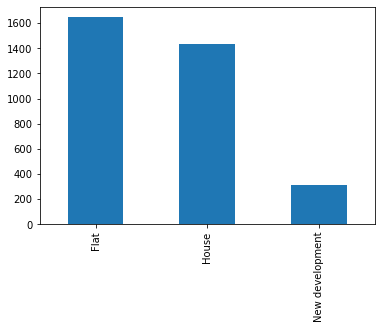

In [29]:
# Plot bar chart of the property type: 
df['House Type'].value_counts().plot(kind='bar')

From the bar plot, we can see the most observed property type in London is Flat (Count = 1647) closley followed by House (Count = 1436), hence both property type Flat and House have similar proportion of amount of the property in London. Flat and House are both simillar in popularity amongst people living in london according to collected observation in the merged dataset. New development only contains a tiny amount (count = 312) for the represented property type in London.

It would make sense for Flats/apartment to have the most count for property type, this is due the amount of people living in london as the space to accomadate people have been limited, so flats have provided an efficient way to maximise the amount of people living in an area like london.

Projects like new developments are just another way to make use of space and is a fairly new concept of property type (not established as Flat/apartments and House).

Amount of houses in london while not the most amount for property type it follows closely to the amount of flats there are. Houses remains the goal for many londoners, as count may be reduced due to reported higher prices than flats as reported by many estate agents in london. 


code adapted from: https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib



# 2.1.2 Inital plot of the direction column (in reference to London):

In [30]:
# Now i am going to check the unique values of direction:
pd.value_counts(df["Direction"])

SW    1488
W      554
E      260
NW     253
N      238
KT     187
TW      92
EC      85
HA      66
SE      58
IG      53
WC      21
WD      14
CR       9
EN       5
CM       4
UB       3
RM       3
SM       1
BR       1
Name: Direction, dtype: int64

In [31]:
# Adapt the postcode to change the Direction in terms of london : N , NW , NE , C , SW, SE , S , E , W
df["Direction"].replace({"KT":"C","TW":"SW","EC":"C","HA":"NW","IG":"E","WC":"C","WD":"NW","CR":"S","EN":"N",
                          "CM":"NE","UB":"W","RM":"E","BR":"SE","SM":"S"},inplace=True)      
# Check to see if they change to the general direcetion through unique counts:  
pd.value_counts(df["Direction"])

SW    1580
W      557
NW     333
E      316
C      293
N      243
SE      59
S       10
NE       4
Name: Direction, dtype: int64

<AxesSubplot:>

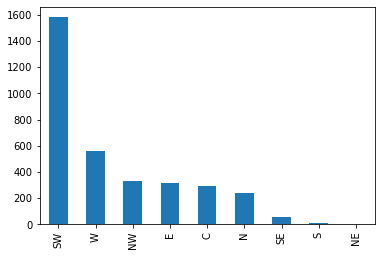

In [32]:
# Plot bar chart of direction in london: 
df["Direction"].value_counts().plot(kind='bar')

Majority of property are in dataset are in the West side of london and more particularly South west london which has  a count of 1580 properrties which is half of the dataset as the other half comprices of the other direction in terms of london.

# 2.1.3 Inital plot for the Size column:

In [33]:
# Code was adapted from https://www.w3schools.com/python/python_conditions.asp
# Code was adapted from https://www.dataquest.io/blog/tutorial-advanced-for-loops-python-pandas/
# Iterating to adapt value for size from small, large to small medium and large.
for i, row in df.iterrows():
    if df.loc[i,"Area in sqm"] <= 120 :
        df.loc[i,"Size"] = 'small'
    if df.loc[i,"Area in sqm"] > 200 :
         df.loc[i,"Size"] = 'large'
    if  df.loc[i,"Area in sqm"] >= 120 and df.loc[i,"Area in sqm"] <200:
         df.loc[i,"Size"] = 'medium'  
pd.value_counts(df["Size"])          

small     1653
medium     882
large      860
Name: Size, dtype: int64

<AxesSubplot:>

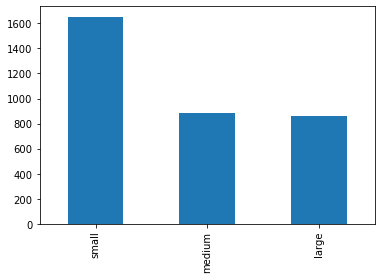

In [34]:
# Plot bar chart of pre-defined property size in london: 
df["Size"].value_counts().plot(kind='bar')

For my predefined property size, a lot of property sizes in london are considered small whilst properties tht have simillar count of medium size then as expected london has a smaller amount of large properties. In london, larger properties are expensive due to increased population and london being a limited space to build more properties.

 Code was adapted from https://www.w3schools.com/python/python_conditions.asp
 Code was adapted from https://www.dataquest.io/blog/tutorial-advanced-for-loops-python-pandas/

# 2.2 Plotting boxplots for the numerical data to detect outliers: 

<AxesSubplot:xlabel='Price', ylabel='House Type'>

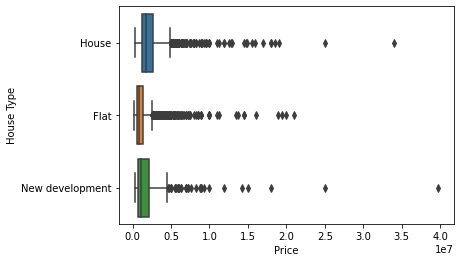

In [35]:
# Now i want to detect if i have any outliers for the numerical features:
# Price (detect outliers using boxplot):
sns.boxplot(x="Price",y="House Type",data=df)

<AxesSubplot:xlabel='No. of Bedrooms', ylabel='House Type'>

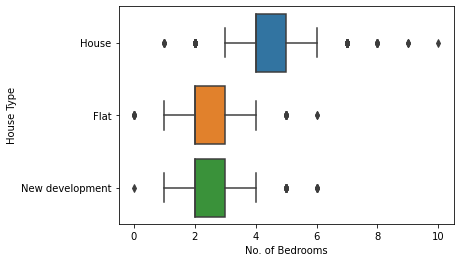

In [36]:
# Number of bedrooms (detect outliers using boxplot):
sns.boxplot(x="No. of Bedrooms",y="House Type",data=df)

<AxesSubplot:xlabel='Area in sqm', ylabel='House Type'>

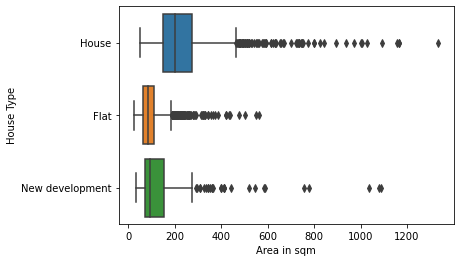

In [37]:
# Area in square metres (detect outliers using boxplot): 
sns.boxplot(x="Area in sqm",y="House Type",data=df)

<AxesSubplot:xlabel='Price per sqm', ylabel='House Type'>

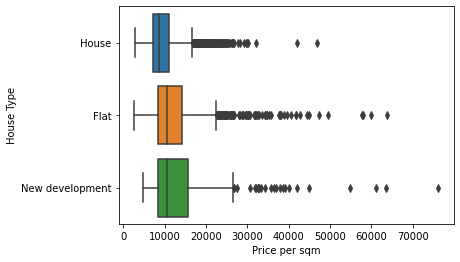

In [38]:
# Price per square metres (detect outliers using boxplot): 
sns.boxplot(x="Price per sqm",y="House Type",data=df)

# 2.2.1 Define the outliers in order to Removal/Winsorizing + dataframe filtering:

In [39]:
# There is so many outlier detected via boxplots particularly for price,Area in sqm 
# for Price per sqm we assume we dealt with the outliers by the prica and area in sqm since it is directly related 
# to those two variables.
# I will be removing extreme values which only in the upper range values (above the maximum) with
# a set upper bound price using the Quantiles to calculate the Interquatile range (IQR), upper quantile (Q3) 
# at p=0.75 and lower quantile (Q1) at p=0.25
# Upper price bound definded as 1.5*IQR + Q3
# First we try detect outliers: (Using the describe table)
Q3_PRICE = df["Price"].quantile([0.75])
Q1_PRICE = df["Price"].quantile([0.25])
print("Q3_PRICE:",Q3_PRICE)
print("Q1_PRICE:",Q1_PRICE)

Q3_PRICE: 0.75    2158000.0
Name: Price, dtype: float64
Q1_PRICE: 0.25    750000.0
Name: Price, dtype: float64


In [40]:
# Use the calculate a max limit for price.
IQR = 2158000 - 750000
UpperPrice_bound = 2158000+ IQR * 1.5
UpperPrice_bound

4270000.0

In [41]:
# There is also many outliers in sqm .I will be removing extreme values which only in the upper range values (above the maximum) with
# a set upper bound price using the Quantiles to calculate the Interquatile range (IQR), upper quantile (Q3) 
# at p=0.75 and lower quantile (Q1) at p=0.25
# Upper Area bound definded as 1.5*IQR + Q3
# First we try detect outliers: (Using the describe table)
Q3_AREA = df["Area in sqm"].quantile([0.75])
Q1_AREA = df["Area in sqm"].quantile([0.25])
print("Area in sqm:",Q3_AREA)
print("Area in sqm:",Q1_AREA)

Area in sqm: 0.75    202.0
Name: Area in sqm, dtype: float64
Area in sqm: 0.25    78.0
Name: Area in sqm, dtype: float64


In [42]:
# Use the calculate a max limit for Area.
IQR = 183 - 76
UpperArea_bound = 183 + IQR * 1.5
UpperArea_bound

343.5

In [43]:
# See which observation has outlier for price, this is a total of 254 observations
df[df['Price']> UpperPrice_bound] 

,Price,House Type,No. of Bedrooms,Postal Code,Size,Longitude,Latitude,Direction,Area in sqm,Price per sqm
34,12500000,House,6,NW1 4ND,large,51.529142,-0.145257,NW,427.0,29274.0
35,6500000,House,6,NW1 4ND,large,51.529142,-0.145257,NW,389.0,16710.0
41,7250000,New development,4,NW3 3DS,large,51.541383,-0.163738,NW,296.0,24493.0
44,5500000,House,4,W1G 7BA,large,51.521279,-0.147350,W,280.0,19643.0
45,8950000,New development,4,SW3 3AA,large,51.491721,-0.162795,SW,293.0,30546.0
...,...,...,...,...,...,...,...,...,...,...
3389,19950000,Flat,5,W1K 7AJ,large,51.511204,-0.156809,W,344.0,57994.0
3391,5275000,Flat,3,SW1A 1JT,medium,51.507387,-0.140579,SW,162.0,32562.0
3392,5995000,House,6,NW11 6TG,large,51.573740,-0.177125,NW,412.0,14551.0
3393,6300000,New development,3,W1S 3AR,medium,51.510369,-0.140918,W,140.0,45000.0


In [44]:
# See which observation has outlier for area, this is a total of 245 observations
df[df['Area in sqm']> UpperArea_bound] 

,Price,House Type,No. of Bedrooms,Postal Code,Size,Longitude,Latitude,Direction,Area in sqm,Price per sqm
29,2500000,House,6,SW17 8RR,large,51.434711,-0.153833,SW,370.0,6757.0
31,2795000,House,5,KT12 1ER,large,51.382165,-0.421300,C,492.0,5681.0
34,12500000,House,6,NW1 4ND,large,51.529142,-0.145257,NW,427.0,29274.0
35,6500000,House,6,NW1 4ND,large,51.529142,-0.145257,NW,389.0,16710.0
53,5250000,House,8,NW3 2UP,large,51.549288,-0.160867,NW,351.0,14957.0
...,...,...,...,...,...,...,...,...,...,...
3384,6250000,House,6,KT22 0PH,large,51.344819,-0.360382,C,1000.0,6250.0
3385,8250000,House,5,NW8 9RE,large,51.527050,-0.177635,NW,366.0,22541.0
3389,19950000,Flat,5,W1K 7AJ,large,51.511204,-0.156809,W,344.0,57994.0
3392,5995000,House,6,NW11 6TG,large,51.573740,-0.177125,NW,412.0,14551.0


In [45]:
# i have decided to remove the outliers for the price  (3395 - 254=3141)
df=df[df['Price']<=UpperPrice_bound] 
df

,Price,House Type,No. of Bedrooms,Postal Code,Size,Longitude,Latitude,Direction,Area in sqm,Price per sqm
0,1675000,House,5,SW19 8NY,large,51.424773,-0.189474,SW,252.0,6647.0
1,650000,Flat,2,EC1V 3PA,small,51.526404,-0.097853,C,76.0,8553.0
2,650000,Flat,2,EC1V 3PA,small,51.526404,-0.097853,C,63.0,10317.0
3,655000,Flat,2,EC1V 3PA,small,51.526404,-0.097853,C,65.0,10077.0
4,695000,Flat,2,EC1V 3PA,small,51.526404,-0.097853,C,74.0,9392.0
...,...,...,...,...,...,...,...,...,...,...
3377,2500000,Flat,4,NW3 7SB,large,51.556878,-0.189239,NW,230.0,10870.0
3380,2495000,House,6,SW20 0RY,large,51.416914,-0.228946,SW,283.0,8816.0
3382,2150000,House,5,TW10 7BS,large,51.438347,-0.306504,SW,295.0,7288.0
3388,1750000,Flat,2,SW10 0XB,medium,51.474417,-0.181073,SW,144.0,12153.0


In [46]:
# i have decided to remove the outliers for the price and area (3141-3013 = 138) 138 more observation reduced
# meaning 
df=df[df['Area in sqm']<=UpperArea_bound] 
df

,Price,House Type,No. of Bedrooms,Postal Code,Size,Longitude,Latitude,Direction,Area in sqm,Price per sqm
0,1675000,House,5,SW19 8NY,large,51.424773,-0.189474,SW,252.0,6647.0
1,650000,Flat,2,EC1V 3PA,small,51.526404,-0.097853,C,76.0,8553.0
2,650000,Flat,2,EC1V 3PA,small,51.526404,-0.097853,C,63.0,10317.0
3,655000,Flat,2,EC1V 3PA,small,51.526404,-0.097853,C,65.0,10077.0
4,695000,Flat,2,EC1V 3PA,small,51.526404,-0.097853,C,74.0,9392.0
...,...,...,...,...,...,...,...,...,...,...
3377,2500000,Flat,4,NW3 7SB,large,51.556878,-0.189239,NW,230.0,10870.0
3380,2495000,House,6,SW20 0RY,large,51.416914,-0.228946,SW,283.0,8816.0
3382,2150000,House,5,TW10 7BS,large,51.438347,-0.306504,SW,295.0,7288.0
3388,1750000,Flat,2,SW10 0XB,medium,51.474417,-0.181073,SW,144.0,12153.0


In [47]:
# Whinsorizing the outlier for bedroom 
# Changing the minimum value for number of bedrooms from 0 to 1: 
# since it makes no sense for number of bedrooms to be 0.
for i, row in df.iterrows():
    if df.loc[i,"No. of Bedrooms"] == 0 :
        df.loc[i,"No. of Bedrooms"] = 1

/Users/sufyaanshaikh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


# 2.2.2 Replot of the boxplots to see the removal of outliers:

<AxesSubplot:xlabel='Price', ylabel='House Type'>

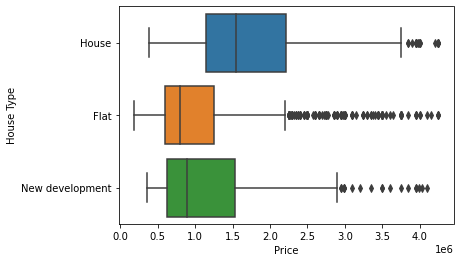

In [48]:
#(3141-3013 = 128) a further 128 observations has been removed. Meaning that the outliers in price and area had 
#(245-128 = 117) 117 observations in common that were outliers
# Now i want to replot boxplots to see the effect of the outlier removal & see the updated boxplots:
# Price 
sns.boxplot(x="Price",y="House Type",data=df)

We can see that house prices have higher prices with a few extreme values even after removal of the outliers. 
For New development prooperties they have the second most price range when comparing to flat and house but has more extreme values than house. 
Flat has the lowest price range with the most extreme values.

<AxesSubplot:xlabel='No. of Bedrooms', ylabel='House Type'>

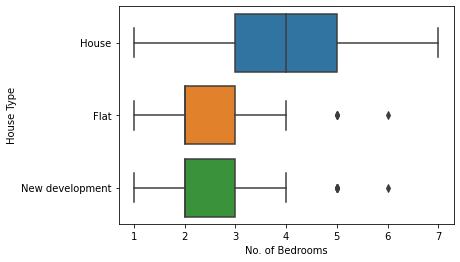

In [49]:
# Replot the boxplot: Number of bedrooms
sns.boxplot(x="No. of Bedrooms",y="House Type",data=df)

The number of bedrooms is higher for property type houses with no extreme values.With flat and new delvelopment having less potential bedroom range even having extreme values less than the non extreme values for house. 

<AxesSubplot:xlabel='Area in sqm', ylabel='House Type'>

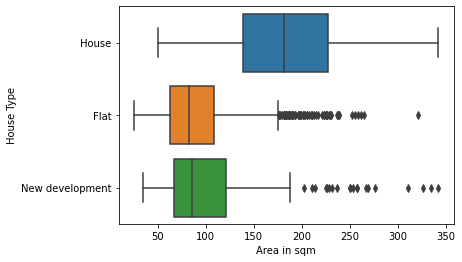

In [50]:
# Replot the boxplot: Number of receptions
sns.boxplot(x="Area in sqm",y="House Type",data=df)

As seen by the boxplots of the property types for 'No. of bedrooms' the area in sqm tell the same comparison with house having a higher range of area space in the property than both flat and new development even with the extreme values. However ,  new development do have a higher area size than flat this could be due to new development being build on the basis on improving the features from flats, one could be improved area size.

<AxesSubplot:xlabel='Price per sqm', ylabel='House Type'>

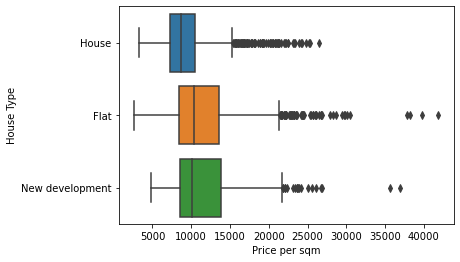

In [51]:
# Area in square metres: 
sns.boxplot(x="Price per sqm",y="House Type",data=df)

Box plot indicates that flat and new developments are much more expensive than house in terms of price per square metres.

# 2.3 Updated plot of the categorical data (after dealing with outliers): 

# 2.3.1 Final plot for the property type

In [52]:
# Check the new count of House Type after  ouliers removal: 
pd.value_counts(df["House Type"])

Flat               1571
House              1176
New development     266
Name: House Type, dtype: int64

<AxesSubplot:>

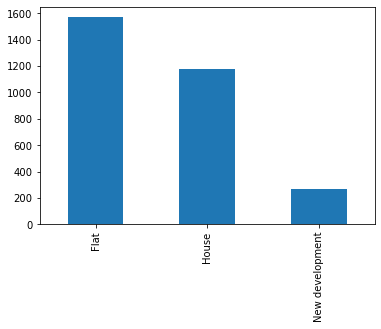

In [53]:
# Bar chart of the property types after outliers removed: 
df['House Type'].value_counts().plot(kind='bar')

From this we can see that property counts are still the same order of size however the difference between flat and house has increased. 

# 2.3.2 Final plot of the direction column (in reference to London): 

In [54]:
# calculate count of the 'direction' again after removal of outliers.
pd.value_counts(df["Direction"])

SW    1414
W      483
E      307
NW     278
N      236
C      231
SE      53
S        7
NE       4
Name: Direction, dtype: int64

<AxesSubplot:>

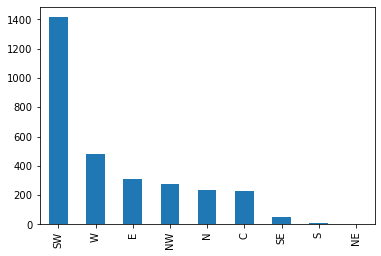

In [55]:
# Replot bar chart of direction in london: 
df["Direction"].value_counts().plot(kind='bar')

Majority properties removes by outliers were removed in south west, as the proportions is quite simillar as before.

# 2.3.2 (part 2) Using longitude and Langitude to visualise the property market in a spatial format:

Can be used to verify that the postcode area/direction is in correct places as well the amount through the cluster of points on the map. The geospatial maps can form geospatial analysis of wheter location affects the type of property build, price of property and area size of property. 

In [56]:
# import london map via shapefile from https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london file:
London_map = gpd.read_file('downloads/statistical-gis-boundaries-london/ESRI/London_Ward.shp')
London_map

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16..."
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16..."
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16..."
4,Beverley,E05000402,187.821,0.0,E09000021,Kingston upon Thames,117161,"POLYGON ((522071.000 168144.900, 522063.900 16..."
...,...,...,...,...,...,...,...,...
644,Aldgate,E05000002,11.227,0.0,E09000001,City of London,51182,"POLYGON ((533326.100 181359.400, 533336.900 18..."
645,Broad Street,E05000008,8.188,0.0,E09000001,City of London,50669,"POLYGON ((532703.800 181263.500, 532707.800 18..."
646,Coleman Street,E05000012,15.404,0.0,E09000001,City of London,122520,"POLYGON ((532880.500 181723.400, 532884.200 18..."
647,Portsoken,E05000021,6.209,0.0,E09000001,City of London,122516,"POLYGON ((533814.300 180968.900, 533757.200 18..."


<AxesSubplot:>

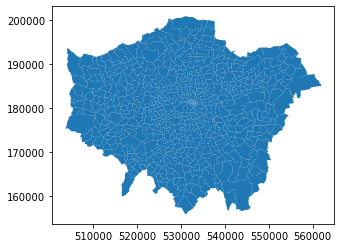

In [57]:
# Plot the shapfile map to verify it's london
London_map.plot()

/Users/sufyaanshaikh/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

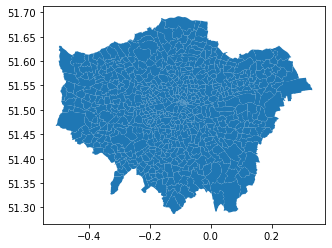

In [58]:
crs={'init':'epsg:4326'} # Coordinate reference system
London_map = London_map.to_crs(crs=crs) # map the london map into crs so i can plot my dataframe 
London_map.plot()

In [59]:
# got geometry point from longitude and latitude form dataframe so i can plot on london map using the crs
geometry = gpd.points_from_xy( df['Latitude'].astype('float32'),df['Longitude'].astype('float32')) 
geodata=gpd.GeoDataFrame(df,crs=crs, geometry=geometry)
geodata

/Users/sufyaanshaikh/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Price,House Type,No. of Bedrooms,Postal Code,Size,Longitude,Latitude,Direction,Area in sqm,Price per sqm,geometry
0,1675000,House,5,SW19 8NY,large,51.424773,-0.189474,SW,252.0,6647.0,POINT (-0.18947 51.42477)
1,650000,Flat,2,EC1V 3PA,small,51.526404,-0.097853,C,76.0,8553.0,POINT (-0.09785 51.52641)
2,650000,Flat,2,EC1V 3PA,small,51.526404,-0.097853,C,63.0,10317.0,POINT (-0.09785 51.52641)
3,655000,Flat,2,EC1V 3PA,small,51.526404,-0.097853,C,65.0,10077.0,POINT (-0.09785 51.52641)
4,695000,Flat,2,EC1V 3PA,small,51.526404,-0.097853,C,74.0,9392.0,POINT (-0.09785 51.52641)
...,...,...,...,...,...,...,...,...,...,...,...
3377,2500000,Flat,4,NW3 7SB,large,51.556878,-0.189239,NW,230.0,10870.0,POINT (-0.18924 51.55688)
3380,2495000,House,6,SW20 0RY,large,51.416914,-0.228946,SW,283.0,8816.0,POINT (-0.22895 51.41692)
3382,2150000,House,5,TW10 7BS,large,51.438347,-0.306504,SW,295.0,7288.0,POINT (-0.30650 51.43835)
3388,1750000,Flat,2,SW10 0XB,medium,51.474417,-0.181073,SW,144.0,12153.0,POINT (-0.18107 51.47442)


<AxesSubplot:>

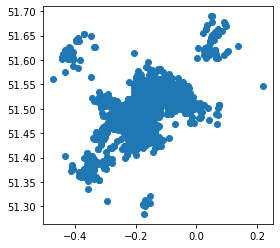

In [60]:
geodata.plot()

<AxesSubplot:>

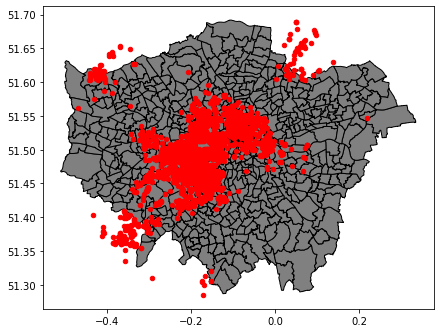

In [61]:
# PLot location of each property:
fig, ax = plt.subplots(figsize=(7,7))
London_map.plot(ax=ax, facecolor='grey', edgecolor='k',alpha=1,linewidth=1)
geodata.plot(ax=ax, markersize=20,color='red',legend=True)

<AxesSubplot:>

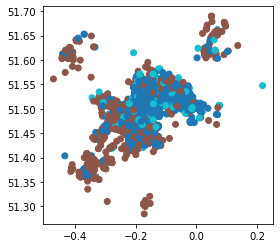

In [62]:
geodata.plot(column="House Type")

<AxesSubplot:>

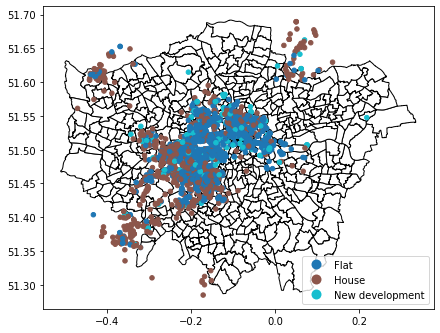

In [63]:
# filterd by property type:
fig, ax = plt.subplots(figsize=(7,7))
London_map.plot(ax=ax, facecolor='White', edgecolor='k',alpha=1,linewidth=1)
geodata.plot(column="House Type",ax=ax, markersize=20,legend=True)

<AxesSubplot:>

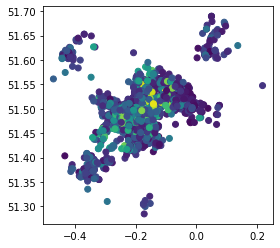

In [64]:
geodata.plot(column="Price")

<AxesSubplot:>

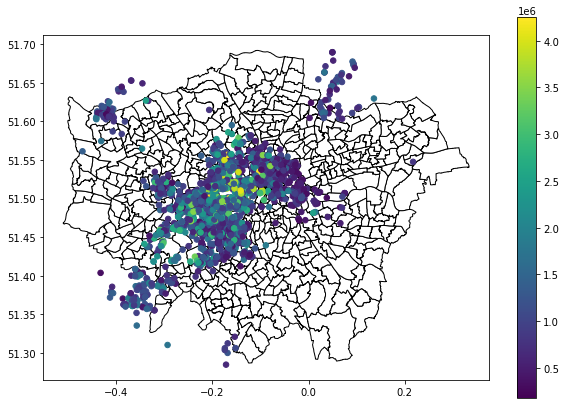

In [65]:
# Filtered by house price: 
fig, ax = plt.subplots(figsize=(10,7))
London_map.plot(ax=ax, facecolor='White', edgecolor='k',alpha=1,linewidth=1)
geodata.plot(column="Price",ax=ax, markersize=30,legend=True)

<AxesSubplot:>

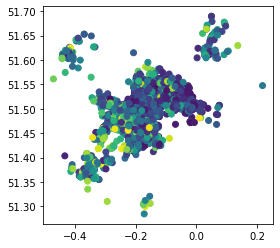

In [66]:
geodata.plot(column="Area in sqm")

<AxesSubplot:>

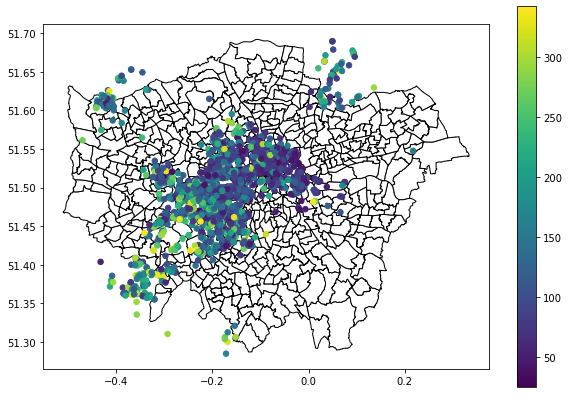

In [67]:
# Filtered by area in sqm:
fig, ax = plt.subplots(figsize=(10,7))
London_map.plot(ax=ax, facecolor='White', edgecolor='k',alpha=1,linewidth=1)
geodata.plot(column="Area in sqm",ax=ax, markersize=30,legend=True)

Code adapted from:

https://medium.com/@ianforrest11/graphing-latitudes-and-longitudes-on-a-map-bf64d5fca391
https://www.linkedin.com/pulse/geopandas-plotting-data-points-map-using-python-régis-nisengwe/ 
https://stackoverflow.com/questions/55054403/geopandas-shapefile-axis-not-on-same-scale-as-actual-picture
https://gis.stackexchange.com/questions/174159/converting-pandas-dataframe-to-geodataframe
https://www.kite.com/python/docs/geopy.Point.from_string

https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london 

# 2.3.3 Final plot for the Size column 

In [68]:
pd.value_counts(df["Size"])

small     1652
medium     847
large      514
Name: Size, dtype: int64

<AxesSubplot:>

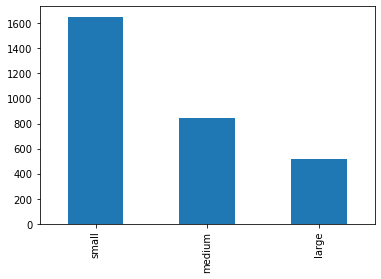

In [69]:
# Replot the considered size of the property:
df["Size"].value_counts().plot(kind='bar')

Outlier removal does not affect the relationship/order of the classes/categorical unique values

# 2.4 Plotting graphs for the numerical data

<AxesSubplot:xlabel='Price', ylabel='Count'>

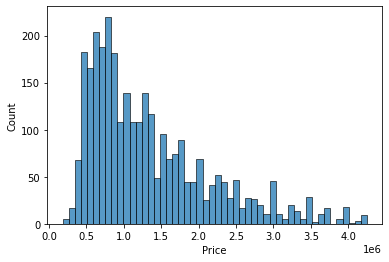

In [70]:
# Analysing the distribution for the variable of interest, 'Price'
fig, ax = plt.subplots()
sns.histplot(df["Price"],bins = 50)
#ax.set_xlim(0,40000000)

Property prices have majority between £400,000 to £1,000,000 in london, which is a lot.It also follows a normal distribution. it's also positively skewed.

In [71]:
print("Skewness: %f" % df['Price'].skew())
print("Kurtosis: %f" % df['Price'].kurt())

Skewness: 1.217951
Kurtosis: 1.012323


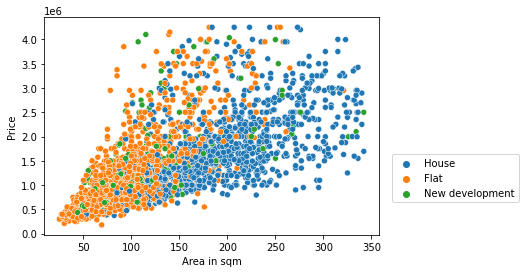

In [72]:
# Plotting scatter plot to see relationship between price and area in square metre
sns.scatterplot(x='Area in sqm',y='Price',data=df,hue='House Type')
plt.legend(loc=(1.04,0.15))

We can see clearly that price and a positive relation where as price increases so does the area in square metre, where we can see that house has more area size inn square metre with flat and new development having the least but prices arre similar in certain cases for the different properties.

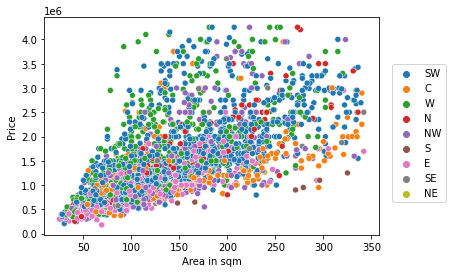

In [73]:
# Plotting scatter plot to see relationship between price and area in sqm filtered by house type:
sns.scatterplot(x='Area in sqm',y='Price',data=df,hue='Direction')
plt.legend(loc=(1.04,0.15))

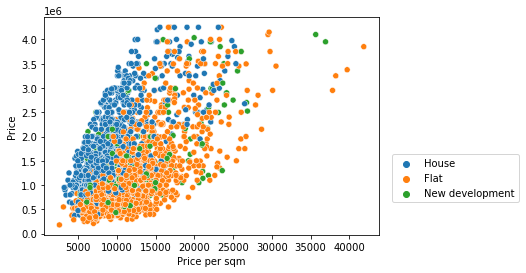

In [96]:
# Plotting scatter plot to see relationship between Price per sqm and price filtered by house type:
sns.scatterplot(x='Price per sqm',y='Price',data=df,hue='House Type')
plt.legend(loc=(1.04,0.15))

Flat and new development cost more per sqm than house as price and price per sqm have a positive corellation, which is confirmed by price & area in sqm having a positive corellation.    

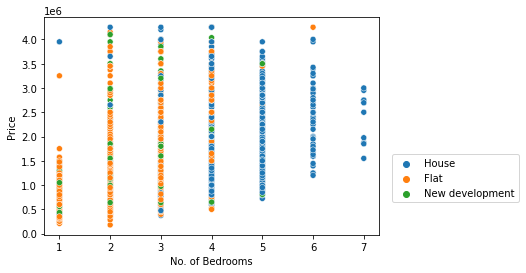

In [97]:
# relationship between bedroom and price
sns.scatterplot(x='No. of Bedrooms',y='Price',data=df,hue='House Type')
plt.legend(loc=(1.04,0.15))

Number of bedroom show  that houses genrally have more bedroooms than any other property type in london. With bedroom between 3 and4 having different type of properties that it could be making it harder to predict the property type.

<AxesSubplot:xlabel='Price per sqm', ylabel='Count'>

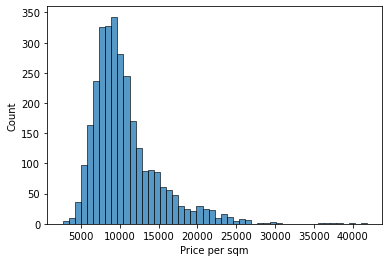

In [76]:
# see distribution of the features: 
# Price per sqm
sns.histplot(df["Price per sqm"],bins = 50)

<AxesSubplot:xlabel='Area in sqm', ylabel='Count'>

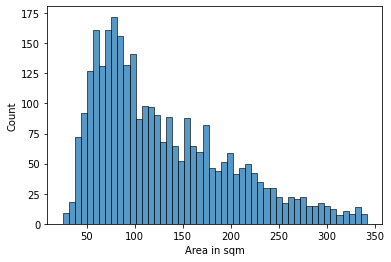

In [77]:
# Area in square metres
sns.histplot(df["Area in sqm"],bins = 50)

In [78]:
import numpy as np
# select from the data types on the numeric variables/columns/features
n= df.select_dtypes(include=np.number)
n

,Price,No. of Bedrooms,Area in sqm,Price per sqm
0,1675000,5,252.0,6647.0
1,650000,2,76.0,8553.0
2,650000,2,63.0,10317.0
3,655000,2,65.0,10077.0
4,695000,2,74.0,9392.0
...,...,...,...,...
3377,2500000,4,230.0,10870.0
3380,2495000,6,283.0,8816.0
3382,2150000,5,295.0,7288.0
3388,1750000,2,144.0,12153.0


<AxesSubplot:>

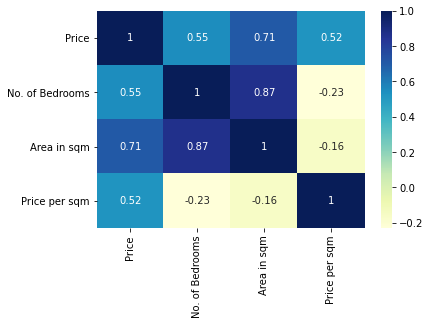

In [79]:
sns.heatmap(n.corr(),cmap="YlGnBu", annot=True)

# 3. Buliding a logistic regression to see whether it can predict property type:

I will be performing a binary classification model,to see whether dataset can predict house or flat.
 The model could be a multinomial classification model with house,flat and New development.But as you can see
 from EDA section where New development having a smaller proportion of count compared to flat and house, possibly because it's not as established as the other 2 property types.

In [80]:
# I derived a new dataframe which only contains the property type for house and flat. The variable "house type" 
# is now know as the response variable.
property = df[df["House Type"]!="New development"]
property=property.drop(columns=['Postal Code','Longitude','Latitude',"geometry"])
property

,Price,House Type,No. of Bedrooms,Size,Direction,Area in sqm,Price per sqm
0,1675000,House,5,large,SW,252.0,6647.0
1,650000,Flat,2,small,C,76.0,8553.0
2,650000,Flat,2,small,C,63.0,10317.0
3,655000,Flat,2,small,C,65.0,10077.0
4,695000,Flat,2,small,C,74.0,9392.0
...,...,...,...,...,...,...,...
3377,2500000,Flat,4,large,NW,230.0,10870.0
3380,2495000,House,6,large,SW,283.0,8816.0
3382,2150000,House,5,large,SW,295.0,7288.0
3388,1750000,Flat,2,medium,SW,144.0,12153.0


In [81]:
# Calculate the count for the response variable: 
pd.value_counts(property["House Type"])

Flat     1571
House    1176
Name: House Type, dtype: int64

<AxesSubplot:>

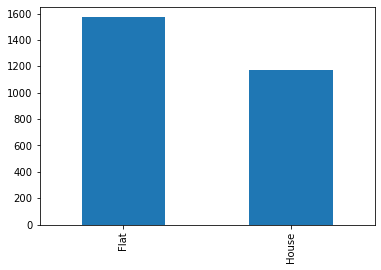

In [82]:
# Plot bar plot of response variable:
property['House Type'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='House Type'>

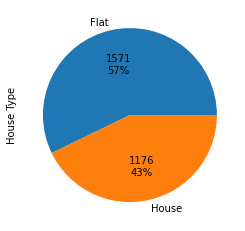

In [83]:
# Plotting pie chart adapted from:
# https://stackoverflow.com/questions/63687789/how-do-i-create-a-pie-chart-using-categorical-data-in-matplotlib
def label_function(val):
    return f'{val / 100 * len(property):.0f}\n{val:.0f}%'

property['House Type'].value_counts().plot(kind='pie',autopct=label_function)

The response variable values are property types which we want to predict Flat and House. From the bar plot and pie chart we can see that the model has a slight imbalance class problem (i.e 4:6), but beacause it is only slight we do not have to rebalance the class imbalance. 

In [84]:
property.groupby('House Type').mean()

,Price,No. of Bedrooms,Area in sqm,Price per sqm
House Type,,,,
Flat,1.069865e+06,2.081477,91.006365,11461.896244
House,1.715177e+06,4.121599,187.193878,9313.825680


In [85]:
property.groupby('Direction').mean().sort_values(by='Price',ascending=True)

,Price,No. of Bedrooms,Area in sqm,Price per sqm
Direction,,,,
E,8.234985e+05,2.388889,104.885185,8216.385185
S,9.078500e+05,4.571429,235.428571,3975.571429
NE,9.874998e+05,4.000000,169.500000,5913.750000
SE,1.071865e+06,2.355556,107.400000,9694.000000
C,1.135597e+06,3.054187,148.059113,8812.847291
N,1.237164e+06,2.665049,118.679612,10273.883495
NW,1.337527e+06,2.826255,128.011583,10697.868726
SW,1.431275e+06,3.163760,139.610311,10585.018196
W,1.606609e+06,2.866359,128.635945,12939.504608


In [86]:
property.groupby('Size').mean().sort_values(by='Price',ascending=True)

,Price,No. of Bedrooms,Area in sqm,Price per sqm
Size,,,,
small,8.554376e+05,1.995876,78.848110,10903.194502
medium,1.669071e+06,3.575188,156.541353,10726.454887
large,2.269686e+06,4.777328,249.933198,9181.860324


In [87]:
# covert flat and house into binary value 0 and 1: 

for i, row in property.iterrows():
    if property.loc[i,"House Type"] == "Flat" :
        property.loc[i,"House Type"] = 1
    else:
        property.loc[i,"House Type"] = 0
property
# convert categorical variables into dummy variables:
size=pd.get_dummies(property["Size"],drop_first=True,prefix="Size_")
direction = pd.get_dummies(property["Direction"],drop_first=True,prefix="Direction_")
# drop categorical columns that are not needed: 
property.drop(['Size','Direction'],axis=1,inplace=True)
# Replace it with the dummy format of the categorical variables:
property = pd.concat([property,size,direction],axis=1)
print(property.head())

     Price House Type  No. of Bedrooms  Area in sqm  Price per sqm  \
0  1675000          0                5        252.0         6647.0   
1   650000          1                2         76.0         8553.0   
2   650000          1                2         63.0        10317.0   
3   655000          1                2         65.0        10077.0   
4   695000          1                2         74.0         9392.0   

   Size__medium  Size__small  Direction__E  Direction__N  Direction__NE  \
0             0            0             0             0              0   
1             0            1             0             0              0   
2             0            1             0             0              0   
3             0            1             0             0              0   
4             0            1             0             0              0   

   Direction__NW  Direction__S  Direction__SE  Direction__SW  Direction__W  
0              0             0              0      

In [88]:
# Splitting the dataset into a training and test set (70%:30%) split:
from sklearn.model_selection import train_test_split 
# X is the features used to predict y the response variable
X = property.loc[:,property.columns != "House Type"]
y = property.loc[:,property.columns == "House Type"]
y = y.astype('int')
# Split dataset into test set (30%) and training set (70%) and shuffle data by random seed 6 for reproducible results
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=6)

columns = X_train.columns

In [89]:
import statsmodels.api as sm 
logit_sm = sm.Logit(y_train,X_train)

result = logit_sm.fit()

print(result.summary2())

         Current function value: 0.293757
         Iterations: 35
                               Results: Logit
Model:                  Logit               Pseudo R-squared:    0.567      
Dependent Variable:     House Type          AIC:                 1157.2003  
Date:                   2021-12-23 12:53    BIC:                 1235.0560  
No. Observations:       1922                Log-Likelihood:      -564.60    
Df Model:               13                  LL-Null:             -1305.1    
Df Residuals:           1908                LLR p-value:         5.2383e-309
Converged:              0.0000              Scale:               1.0000     
No. Iterations:         35.0000                                             
----------------------------------------------------------------------------
                 Coef.    Std.Err.     z     P>|z|     [0.025       0.975]  
----------------------------------------------------------------------------
Price            -0.0000     0.0000  -2.2

/Users/sufyaanshaikh/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p-values are smaller than 0.05 execpt for 4 dummy variables of direction (N,NE,S,SW) so remove these variables.

In [90]:
cols = ["Price","No. of Bedrooms","Area in sqm","Price per sqm",
        "Size__medium","Size__small","Direction__E","Direction__SE",
        "Direction__NW","Direction__W"]
# Splitting the dataset into a training and test set (70%:30%) split:
from sklearn.model_selection import train_test_split 
# X is the features used to predict y the response variable
X = property[cols]
y = property.loc[:,property.columns == "House Type"]
y = y.astype('int')
# Split dataset into test set (30%) and training set (70%) and shuffle data by random seed 6 for reproducible results
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=6)

columns = X_train.columns

logit_sm = sm.Logit(y_train,X_train)

result = logit_sm.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.295038
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.566    
Dependent Variable: House Type       AIC:              1154.1261
Date:               2021-12-23 12:53 BIC:              1209.7373
No. Observations:   1922             Log-Likelihood:   -567.06  
Df Model:           9                LL-Null:          -1305.1  
Df Residuals:       1912             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
Price           -0.0000   0.0000  -2.4481 0.0144 -0.0000 -0.0000
No. of Bedrooms -1.7154   0.1327 -12.9252 0.0000 -1.9755 -1.4553
Area in sqm  

In [91]:
cols = ["Price","No. of Bedrooms","Area in sqm","Price per sqm",
        "Size__medium","Size__small","Direction__NW","Direction__W"]
# Splitting the dataset into a training and test set (70%:30%) split:
from sklearn.model_selection import train_test_split 
# X is the features used to predict y the response variable
X_final = property[cols]
y_final = property.loc[:,property.columns == "House Type"]
y_final = y.astype('int')
# Split dataset into test set (30%) and training set (70%) and shuffle data by random seed 6 for reproducible results
X_train,X_test,y_train,y_test = train_test_split(X_final,y_final,test_size=0.3,random_state=6)


logit_sm = sm.Logit(y_train,X_train)

result = logit_sm.fit()


print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.296639
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.563    
Dependent Variable: House Type       AIC:              1156.2785
Date:               2021-12-23 12:53 BIC:              1200.7675
No. Observations:   1922             Log-Likelihood:   -570.14  
Df Model:           7                LL-Null:          -1305.1  
Df Residuals:       1914             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
Price           -0.0000   0.0000  -2.4846 0.0130 -0.0000 -0.0000
No. of Bedrooms -1.7207   0.1322 -13.0195 0.0000 -1.9798 -1.4617
Area in sqm  

In [92]:
from sklearn.linear_model import LogisticRegression
# Logistic regression model : 
logreg = LogisticRegression(random_state=6)
# Fit the model with training data
logreg.fit(X_train,y_train.values.ravel())
# predict the classifier using the test set
y_pred = logreg.predict(X_test)

# 3.2 Evaluating Logisitic regression model: 

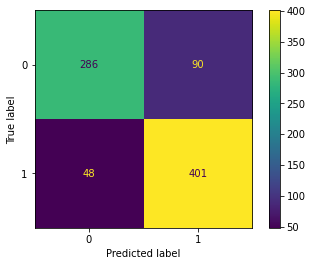

In [93]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
from sklearn.metrics import plot_confusion_matrix
confusion_matrix = plot_confusion_matrix(logreg,X_test, y_test)

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81       376
           1       0.82      0.89      0.85       449

    accuracy                           0.83       825
   macro avg       0.84      0.83      0.83       825
weighted avg       0.83      0.83      0.83       825



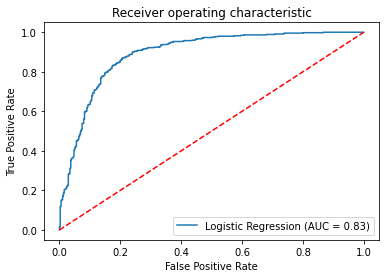

In [95]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
https://towardsdatascience.com/logistic-regression-a-simplified-approach-using-python-c4bc81a87c31